In [207]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = "nanumGothic"
plt.rcParams['axes.unicode_minus'] = False

# 1인가구비율 대비 범죄발생 수의 상관관계

In [12]:
seoul_single = pd.read_csv("data-files/seoul-single.csv")
seoul_total = pd.read_csv("data-files/seoul-total.csv")

In [ ]:
seoul_total.head()

In [ ]:
seoul_total.iloc[0:,:1]

In [ ]:

seoul_single.head()

In [ ]:
seoul_total.info()

In [ ]:
seoul_single.drop([0,1], axis = 0, inplace=True ) # 0행 삭제


In [28]:

cols = seoul_single.columns
seoul_single.drop(cols[0], axis = 1, inplace=True ) # 쓸모없는 컬럼 삭제

In [18]:
# 컬럼명 변경
seoul_single.rename(columns={'자치구별(2)' : '자치구별'}, inplace=True)

In [35]:
# # int 변환
for col in seoul_single.columns[1:]:
   seoul_single[col] = seoul_single[col].map(lambda v: int(v.replace(",", "")))

In [20]:
# 인덱스 리셋
seoul_single.reset_index(drop = True, inplace=True)

In [21]:
seoul_total.drop([0,1], axis = 0, inplace=True )

In [22]:
seoul_total.rename(columns={'행정구역(시군구)별' : '자치구별'}, inplace=True)
seoul_total.reset_index(drop = True, inplace=True)

In [31]:



for col1 in seoul_total.columns[1:]:
   seoul_total[col1] = seoul_total[col1].map(lambda v: int(v.replace(",", "")))

In [57]:
seoul_single_sum = seoul_single.iloc[0:,1:].sum(axis=1)

In [58]:
seoul_total_sum = seoul_total.iloc[0:,1:].sum(axis=1)

In [65]:
seoul_single_sum, seoul_total_sum

(0     200961
 1     174486
 2     282718
 3     327673
 4     475128
 5     467693
 6     421227
 7     467050
 8     340447
 9     261095
 10    427787
 11    422682
 12    375063
 13    476430
 14    297358
 15    619900
 16    382846
 17    307906
 18    468496
 19    482337
 20    954656
 21    335979
 22    530033
 23    534479
 24    374703
 dtype: int64,
 0     1202294
 1      996763
 2     1822056
 3     2370726
 4     2806290
 5     2776996
 6     3200734
 7     3530281
 8     2516562
 9     2670720
 10    4310951
 11    3859307
 12    2482174
 13    2996995
 14    3698209
 15    4698661
 16    3258023
 17    1865737
 18    2985115
 19    3147320
 20    3989373
 21    3441565
 22    4388682
 23    5310324
 24    3585390
 dtype: int64)

In [67]:
# seoul_single_total_crime = pd.DataFrame({"범죄발생수":seoul_crime_sum,"1인가구수":seoul_single_sum, "총인구":seoul_total_sum})

In [73]:
seoul_crime = pd.read_csv("data-files/crime.csv")

In [238]:
seoul_crime.head()

,자치구별,2015,2015.1,2015.2,2015.3,2015.4,2015.5,2015.6,2015.7,2015.8,...,2022.2,2022.3,2022.4,2022.5,2022.6,2022.7,2022.8,2022.9,2022.10,2022.11
0,종로구,4705,4430,6,8,11,13,211,1139,2184,...,2,3,8,8,228,988,1313,932,1587,1353
1,중구,4954,2942,3,2,9,6,170,111,2548,...,1,2,5,4,194,123,1365,724,1506,1266
2,용산구,3820,2483,5,5,14,14,194,173,1557,...,5,3,7,7,280,238,978,508,1697,1337
3,성동구,3358,2123,4,4,9,8,126,119,1607,...,2,2,2,2,125,97,979,538,1086,958
4,광진구,5909,3707,4,4,14,26,240,220,3026,...,6,5,-,-,230,174,1670,831,1713,1488


In [76]:
seoul_crime.drop([0,1,2], axis = 0, inplace=True ) # 행 제거

In [78]:

cols2 = seoul_crime.columns

seoul_crime.drop(cols[0], axis = 1, inplace=True ) # 컬럼 제거

In [84]:
seoul_crime.rename(columns={'자치구별(2)' : '자치구별'}, inplace=True) # 컬럼명 변경

seoul_crime.reset_index(drop = True, inplace=True) # 인덱스 리셋

In [ ]:
seoul_crime.info(0)

In [237]:
seoul_crime.iloc[0:,1::12]

,2015,2016,2017,2018,2019,2020,2021,2022
0,4705,4459,4057,3690,3846,3102,2712,3138
1,4954,4584,4184,4030,4327,3411,2861,3071
2,3820,4137,4060,3411,3313,2969,2381,2967
3,3358,3026,2767,2457,2512,2362,2112,2194
4,5909,5322,4646,3915,4011,3601,3087,3619
5,4720,4787,3975,3680,3692,3401,2959,3253
6,5193,5041,4571,4288,4268,3726,3210,3599
7,4154,3744,3434,3042,2877,2567,2411,2749
8,4257,4229,3393,3437,3838,2770,2301,2832
9,2664,2438,1999,2249,2110,2179,1860,2141


In [145]:
seoul_crime_total = seoul_crime.iloc[0:,1::12]

In [178]:
seoul_crime_total.columns[3:]

Index(['2018', '2019', '2020', '2021', '2022'], dtype='object')

In [179]:
for col in seoul_crime_total.columns[3:]:
   seoul_crime_total[col] = seoul_crime_total[col].map(lambda v: int(v.replace(",", "")))

In [180]:
seoul_crime_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2015    25 non-null     int64
 1   2016    25 non-null     int64
 2   2017    25 non-null     int64
 3   2018    25 non-null     int64
 4   2019    25 non-null     int64
 5   2020    25 non-null     int64
 6   2021    25 non-null     int64
 7   2022    25 non-null     int64
dtypes: int64(8)
memory usage: 1.7 KB


In [185]:
seoul_crime_sum = seoul_crime_total.iloc[0:,0:].sum(axis=1)

In [186]:
seoul_crime_sum

0     29709
1     31422
2     27058
3     20788
4     34110
5     30467
6     33896
7     24978
8     27057
9     17640
10    33106
11    30720
12    23737
13    38343
14    28651
15    38697
16    36942
17    24703
18    45033
19    25697
20    42486
21    38125
22    59752
23    45240
24    32857
dtype: int64

In [191]:
seoul_single_ratio = seoul_single_sum / seoul_total_sum

In [192]:
seoul_single_ratio

0     0.167148
1     0.175053
2     0.155164
3     0.138216
4     0.169308
5     0.168417
6     0.131603
7     0.132298
8     0.135283
9     0.097762
10    0.099233
11    0.109523
12    0.151103
13    0.158969
14    0.080406
15    0.131931
16    0.117509
17    0.165032
18    0.156944
19    0.153253
20    0.239300
21    0.097624
22    0.120773
23    0.100649
24    0.104508
dtype: float64

In [193]:
seoul_single_total_crime = pd.DataFrame({"범죄발생수":seoul_crime_sum,"1인가구수":seoul_single_sum, "총인구":seoul_total_sum, "1인가구비율":seoul_single_ratio})

In [194]:
seoul_single_total_crime

,범죄발생수,1인가구수,총인구,1인가구비율
0,29709,200961,1202294,0.167148
1,31422,174486,996763,0.175053
2,27058,282718,1822056,0.155164
3,20788,327673,2370726,0.138216
4,34110,475128,2806290,0.169308
5,30467,467693,2776996,0.168417
6,33896,421227,3200734,0.131603
7,24978,467050,3530281,0.132298
8,27057,340447,2516562,0.135283
9,17640,261095,2670720,0.097762


In [195]:
seoul_single_total_crime.to_csv("data-files/seoul_single_total_crime.csv", encoding="utf-8", index=True)

In [196]:
seoul_single_total_crime.corr(method="pearson")

,범죄발생수,1인가구수,총인구,1인가구비율
범죄발생수,1.000000,0.528124,0.551017,0.038883
1인가구수,0.528124,1.000000,0.652671,0.390108
총인구,0.551017,0.652671,1.000000,-0.423318
1인가구비율,0.038883,0.390108,-0.423318,1.000000


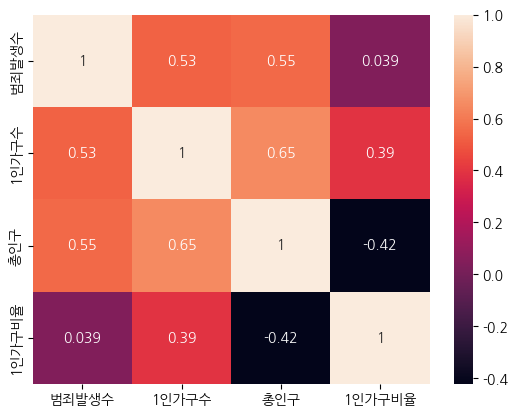

In [208]:
sns.heatmap(seoul_single_total_crime.corr(method="pearson"), annot=True)
plt.show()

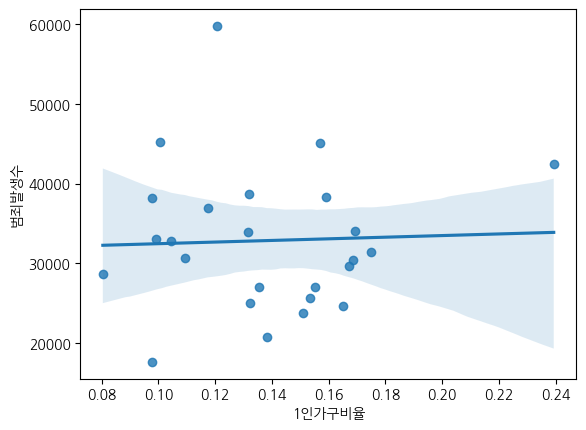

In [216]:
#seoul_single_total_crime = sns.seoul_single_total_crime.csv("seoul_single_total_crime")
sns.regplot(x="1인가구비율", y="범죄발생수",  data=seoul_single_total_crime)

plt.show()
